# Import libreraies

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import string

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install category_encoders

     |████████████████████████████████| 82 kB 353 kB/s 


In [6]:
pip install kmodes

In [7]:
import category_encoders as cat

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#install KModes
from kmodes.kmodes import KModes


In [10]:
movies = pd.read_csv('/content/netflix_titles.csv')

movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
columns = movies.columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
X = movies.values
X = imputer.fit_transform(X)
movies = pd.DataFrame(X)
movies.columns = columns
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
movies.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

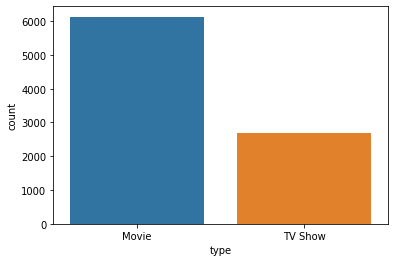

In [16]:
sns.countplot(x='type' ,data= movies)

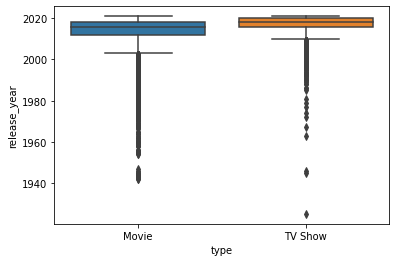

In [17]:
sns.boxplot(x='type' ,y='release_year',data= movies)

## Cleaning data

In [19]:
movies.shape

(8807, 12)

In [20]:
movies.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [21]:
movies.describe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4528,7692,748,1767,74,17,220,514,8775
top,s2469,Movie,The Black Prince,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",2018,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2653,844,3649,119,1147,3211,1796,362,4


In [23]:
#numbers of years
print(movies['release_year'].min())
print(movies['release_year'].max())

1925
2021


In [26]:
#names of columns
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [28]:
#drop columns that we do not need
df_movies = movies.drop(['show_id','director', 'cast','rating', 'date_added', 'description'], axis = 1) 
df_movies.head(10)

,type,title,country,release_year,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,Midnight Mass,United States,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,Movie,My Little Pony: A New Generation,United States,2021,91 min,Children & Family Movies
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV"
9,Movie,The Starling,United States,2021,104 min,"Comedies, Dramas"


In [29]:
#rename column(listed_in)to (category) 
df = df_movies.rename(columns={'listed_in':'category'})
df

,type,title,country,release_year,duration,category
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,United States,2009,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,United States,2006,88 min,"Children & Family Movies, Comedies"


In [30]:
#remove rows with null values
df.dropna(inplace = True)
df.isnull().sum()
df.shape

(8807, 6)

In [31]:
a=df[df['category']=="Documentaries"]

In [32]:
a

,type,title,country,release_year,duration,category
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries
45,Movie,My Heroes Were Cowboys,United States,2021,23 min,Documentaries
117,Movie,Final Account,"United Kingdom, United States",2021,94 min,Documentaries
221,Movie,"Bob Ross: Happy Accidents, Betrayal & Greed",United States,2021,93 min,Documentaries
304,Movie,Lady Boss: The Jackie Collins Story,United Kingdom,2021,97 min,Documentaries
...,...,...,...,...,...,...
8723,Movie,What Makes a Psychopath?,United Kingdom,2017,52 min,Documentaries
8737,Movie,Why Are We Getting So Fat?,United Kingdom,2016,50 min,Documentaries
8738,Movie,Why Knot,"Canada, India, Thailand, United States, United...",2016,84 min,Documentaries
8739,Movie,Why We Fight: The Battle of Russia,United States,1943,82 min,Documentaries


In [34]:
b=df[df['category']=="Dramas"]

In [35]:
b

,type,title,country,release_year,duration,category
112,Movie,Worth,United States,2021,119 min,Dramas
129,Movie,An Unfinished Life,"Germany, United States",2005,108 min,Dramas
142,Movie,Freedom Writers,"Germany, United States",2007,124 min,Dramas
162,Movie,Marshall,"United States, China, Hong Kong",2017,118 min,Dramas
329,Movie,Catch Me If You Can,"United States, Canada",2002,142 min,Dramas
...,...,...,...,...,...,...
8674,Movie,Viceroy's House,"United Kingdom, India, Sweden",2017,106 min,Dramas
8675,Movie,Victor,United States,2015,110 min,Dramas
8685,Movie,VS.,United Kingdom,2018,99 min,Dramas
8691,Movie,Wakefield,United States,2016,109 min,Dramas


In [36]:
df['category'] = df['category'].str.replace('&',',')
df

,type,title,country,release_year,duration,category
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,United States,2009,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,United States,2006,88 min,"Children , Family Movies, Comedies"


In [40]:
new_data = df["category"].str.split(",", n = 5, expand = True)
new_data

,0,1,2,3,4,5
0,Documentaries,None,None,None,None,None
1,International TV Shows,TV Dramas,TV Mysteries,None,None,None
2,Crime TV Shows,International TV Shows,TV Action,Adventure,None,None
3,Docuseries,Reality TV,None,None,None,None
4,International TV Shows,Romantic TV Shows,TV Comedies,None,None,None
...,...,...,...,...,...,...
8802,Cult Movies,Dramas,Thrillers,None,None,None
8803,Kids' TV,Korean TV Shows,TV Comedies,None,None,None
8804,Comedies,Horror Movies,None,None,None,None
8805,Children,Family Movies,Comedies,None,None,None


In [41]:
new_data1=df.merge(new_data, left_index=True, right_index = True)
new_data1.head()

,type,title,country,release_year,duration,category,0,1,2,3,4,5
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,Documentaries,None,None,None,None,None
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,TV Dramas,TV Mysteries,None,None,None
2,TV Show,Ganglands,United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action,Adventure,None,None
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,None,None,None,None
4,TV Show,Kota Factory,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Comedies,None,None,None


In [42]:
new_data2 = new_data1.drop(['category'], axis = 1) 
new_data2.head(10)

,type,title,country,release_year,duration,0,1,2,3,4,5
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,None,None,None,None,None
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,None,None,None
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,None,None
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,None,None,None,None
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,None,None,None
5,TV Show,Midnight Mass,United States,2021,1 Season,TV Dramas,TV Horror,TV Mysteries,None,None,None
6,Movie,My Little Pony: A New Generation,United States,2021,91 min,Children,Family Movies,None,None,None,None
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,Dramas,Independent Movies,International Movies,None,None,None
8,TV Show,The Great British Baking Show,United Kingdom,2021,9 Seasons,British TV Shows,Reality TV,None,None,None,None
9,Movie,The Starling,United States,2021,104 min,Comedies,Dramas,None,None,None,None


In [43]:
new_data3 = new_data2.drop([5], axis = 1) 
print(new_data3.head(10))
print(new_data3.shape)

      type                             title  ...           3     4
0    Movie              Dick Johnson Is Dead  ...        None  None
1  TV Show                     Blood & Water  ...        None  None
2  TV Show                         Ganglands  ...   Adventure  None
3  TV Show             Jailbirds New Orleans  ...        None  None
4  TV Show                      Kota Factory  ...        None  None
5  TV Show                     Midnight Mass  ...        None  None
6    Movie  My Little Pony: A New Generation  ...        None  None
7    Movie                           Sankofa  ...        None  None
8  TV Show     The Great British Baking Show  ...        None  None
9    Movie                      The Starling  ...        None  None

[10 rows x 10 columns]
(8807, 10)


In [55]:
new_data3

,type,title,country,release_year,duration,0,1,2,3,4
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,None,None,None,None
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,None,None
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,None
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,None,None,None
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,None,None
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,Cult Movies,Dramas,Thrillers,None,None
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,Kids' TV,Korean TV Shows,TV Comedies,None,None
8804,Movie,Zombieland,United States,2009,88 min,Comedies,Horror Movies,None,None,None
8805,Movie,Zoom,United States,2006,88 min,Children,Family Movies,Comedies,None,None


In [56]:
df1=new_data3.rename(columns={0 :'A'})
df2=df1.rename(columns={1 :'B'})
df3=df2.rename(columns={2 :'C'})
df4=df3.rename(columns={3 :'D'})
df5=df4.rename(columns={4 :'E'})


In [81]:
df5

,type,title,country,release_year,duration,A,B,C,D,E
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,None,None,None,None
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,None,None
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,None
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,None,None,None
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,None,None
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,Cult Movies,Dramas,Thrillers,None,None
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,Kids' TV,Korean TV Shows,TV Comedies,None,None
8804,Movie,Zombieland,United States,2009,88 min,Comedies,Horror Movies,None,None,None
8805,Movie,Zoom,United States,2006,88 min,Children,Family Movies,Comedies,None,None


In [83]:
df6=df5.fillna(df5.mode().iloc[0])
df6

,type,title,country,release_year,duration,A,B,C,D,E
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,International Movies,Fantasy
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,Fantasy
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,International Movies,International Movies,Fantasy
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,International Movies,Fantasy
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,Cult Movies,Dramas,Thrillers,International Movies,Fantasy
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,Kids' TV,Korean TV Shows,TV Comedies,International Movies,Fantasy
8804,Movie,Zombieland,United States,2009,88 min,Comedies,Horror Movies,International Movies,International Movies,Fantasy
8805,Movie,Zoom,United States,2006,88 min,Children,Family Movies,Comedies,International Movies,Fantasy


In [84]:
df6.isnull()

,type,title,country,release_year,duration,A,B,C,D,E
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False


In [86]:
df6.isnull().sum()

type            0
title           0
country         0
release_year    0
duration        0
A               0
B               0
C               0
D               0
E               0
dtype: int64

#Some information about the movies

In [104]:
df6.columns

Index(['type', 'title', 'country', 'release_year', 'duration', 'A', 'B', 'C',
       'D', 'E'],
      dtype='object')

In [105]:
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [106]:
ii=df6.loc[df6['release_year'] == 2020]

In [107]:
ii.head()

,type,title,country,release_year,duration,A,B,C,D,E
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
16,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,United States,2020,67 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
17,TV Show,Falsa identidad,Mexico,2020,2 Seasons,Crime TV Shows,Spanish-Language TV Shows,TV Dramas,International Movies,Fantasy
32,TV Show,Sex Education,United Kingdom,2020,3 Seasons,British TV Shows,International TV Shows,TV Comedies,International Movies,Fantasy
34,TV Show,Tayo and Little Wizards,United States,2020,1 Season,Kids' TV,International Movies,International Movies,International Movies,Fantasy


In [108]:
ii.shape

(953, 10)

In [109]:
df6.loc[df6['title'] == 'Surviving R. Kelly Part II: The Reckoning']

,type,title,country,release_year,duration,A,B,C,D,E
8132,TV Show,Surviving R. Kelly Part II: The Reckoning,United States,2020,1 Season,Crime TV Shows,Docuseries,International Movies,International Movies,Fantasy


In [110]:
df6.loc[df6['title'] == 'Cuddle Weather']

,type,title,country,release_year,duration,A,B,C,D,E
2912,Movie,Cuddle Weather,Philippines,2019,95 min,Dramas,International Movies,Romantic Movies,International Movies,Fantasy


In [111]:
df6.loc[df6['release_year'] == 2021]

,type,title,country,release_year,duration,A,B,C,D,E
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,International Movies,Fantasy
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,Fantasy
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,International Movies,International Movies,Fantasy
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,International Movies,Fantasy
5,TV Show,Midnight Mass,United States,2021,1 Season,TV Dramas,TV Horror,TV Mysteries,International Movies,Fantasy
...,...,...,...,...,...,...,...,...,...,...
1468,Movie,What Happened to Mr. Cha?,South Korea,2021,102 min,Comedies,International Movies,International Movies,International Movies,Fantasy
1551,TV Show,Hilda,"United Kingdom, Canada, United States",2021,2 Seasons,Kids' TV,International Movies,International Movies,International Movies,Fantasy
1696,TV Show,Polly Pocket,"Canada, United States, Ireland",2021,2 Seasons,Kids' TV,International Movies,International Movies,International Movies,Fantasy
2920,TV Show,Love Is Blind,United States,2021,1 Season,Reality TV,Romantic TV Shows,International Movies,International Movies,Fantasy


In [129]:
df6.loc[df6['release_year'] == 1925]

,type,title,country,release_year,duration,A,B,C,D,E
4250,TV Show,Pioneers: First Women Filmmakers*,United States,1925,1 Season,TV Shows,International Movies,International Movies,International Movies,Fantasy


In [131]:
df6.loc[df6['release_year'] ==2000]


,type,title,country,release_year,duration,A,B,C,D,E
180,Movie,The Nutty Professor II: The Klumps,United States,2000,107 min,Comedies,Romantic Movies,International Movies,International Movies,Fantasy
350,Movie,Space Cowboys,United States,2000,130 min,Action,Adventure,Dramas,Sci-Fi,Fantasy
359,Movie,The Original Kings of Comedy,United States,2000,111 min,Stand-Up Comedy,International Movies,International Movies,International Movies,Fantasy
566,Movie,Charlie's Angels,"United States, Germany",2000,98 min,Action,Adventure,Comedies,International Movies,Fantasy
593,Movie,Snow Day,United States,2000,89 min,Children,Family Movies,Comedies,International Movies,Fantasy
779,Movie,Battlefield Earth,United States,2000,118 min,Action,Adventure,Cult Movies,Sci-Fi,Fantasy
952,Movie,The Whole Nine Yards,United States,2000,99 min,Action,Adventure,Comedies,International Movies,Fantasy
2173,TV Show,Moesha,United States,2000,6 Seasons,TV Comedies,Teen TV Shows,International Movies,International Movies,Fantasy
3472,Movie,Rugrats in Paris: The Movie,"Germany, United States",2000,79 min,Children,Family Movies,Comedies,International Movies,Fantasy
4545,Movie,Monty Python: Before the Flying Circus,United Kingdom,2000,56 min,Comedies,Documentaries,International Movies,International Movies,Fantasy


In [137]:
df6.loc[df6['release_year'] == 2000].shape


(37, 10)

In [138]:
df6.nunique()

type               2
title           8807
country          748
release_year      74
duration         220
A                 36
B                 41
C                 44
D                 33
E                 17
dtype: int64

## Exploratory Data Analysis

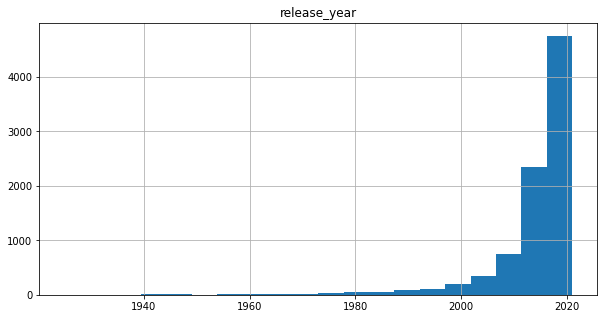

In [139]:
#Simple Distribution Plots for all Features¶
plt.rcParams["figure.figsize"] = (10, 5)
df6.hist(bins=20)
plt.show()

## Incoding Categorical Data

Method (Label Encoding)


Movie >> 1

TV Show >> 2


In [140]:
df6.type[df6.type == 'Movie'] = 1
df6.type[df6.type == 'TV Show'] = 2
df6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type,title,country,release_year,duration,A,B,C,D,E
0,1,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
1,2,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,International Movies,Fantasy
2,2,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,Fantasy
3,2,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,International Movies,International Movies,Fantasy
4,2,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,International Movies,Fantasy
...,...,...,...,...,...,...,...,...,...,...
8802,1,Zodiac,United States,2007,158 min,Cult Movies,Dramas,Thrillers,International Movies,Fantasy
8803,2,Zombie Dumb,United States,2018,2 Seasons,Kids' TV,Korean TV Shows,TV Comedies,International Movies,Fantasy
8804,1,Zombieland,United States,2009,88 min,Comedies,Horror Movies,International Movies,International Movies,Fantasy
8805,1,Zoom,United States,2006,88 min,Children,Family Movies,Comedies,International Movies,Fantasy


In [141]:
print(len(df6['A'].value_counts()))


36


In [154]:
print(df6['A'].value_counts())

Dramas                       1600
Comedies                     1210
Action                        859
Documentaries                 829
International TV Shows        774
Children                      605
Crime TV Shows                399
Kids' TV                      388
Stand-Up Comedy               334
Horror Movies                 275
British TV Shows              253
Docuseries                    221
Anime Series                  176
International Movies          128
TV Comedies                   120
Reality TV                    120
Classic Movies                 80
TV Dramas                      67
Thrillers                      65
Movies                         57
TV Action                      40
Stand-Up Comedy                34
Romantic TV Shows              32
Classic                        22
Anime Features                 21
Independent Movies             20
Music                          18
TV Shows                       16
Sci-Fi                         13
Cult Movies   

In [143]:
df6

,type,title,country,release_year,duration,A,B,C,D,E
0,1,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
1,2,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,International Movies,Fantasy
2,2,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,Fantasy
3,2,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,International Movies,International Movies,Fantasy
4,2,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,International Movies,Fantasy
...,...,...,...,...,...,...,...,...,...,...
8802,1,Zodiac,United States,2007,158 min,Cult Movies,Dramas,Thrillers,International Movies,Fantasy
8803,2,Zombie Dumb,United States,2018,2 Seasons,Kids' TV,Korean TV Shows,TV Comedies,International Movies,Fantasy
8804,1,Zombieland,United States,2009,88 min,Comedies,Horror Movies,International Movies,International Movies,Fantasy
8805,1,Zoom,United States,2006,88 min,Children,Family Movies,Comedies,International Movies,Fantasy


Comedies                  >   7

Action                    >    0

Documentaries             >    10

International TV Shows    >    16

Children                  >    4

Crime TV Shows            >    8

Kids' TV                  >    17

Stand-Up Comedy           >    27

Horror Movies             >    13

British TV Shows          >    3

Docuseries                >    11

Anime Series              >    2

International Movies      >    15

TV Comedies               >    30

Reality TV                >    21

Classic Movies            >     6

TV Dramas                 >     21

Thrillers                 >     25

Movies                    >     19

TV Action                 >     29

Stand-Up Comedy           >     28

Romantic TV Shows         >     23

Anime Features            >     1

Classic                   >     5

Independent Movies        >     14

Music                     >     20

TV Shows                  >     34

TV Horror                 >     32

Sci-Fi                    >      24

Cult Movies               >      9

Romantic Movies           >      22

Spanish-Language TV Shows   >    25

Sports Movies      >             26

LGBTQ Movies       >             18

TV Sci-Fi          >             33






In [144]:
df7 = df6.select_dtypes(include=['object']).copy()
df7.head()

,type,title,country,duration,A,B,C,D,E
0,1,Dick Johnson Is Dead,United States,90 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
1,2,Blood & Water,South Africa,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,International Movies,Fantasy
2,2,Ganglands,United States,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,Fantasy
3,2,Jailbirds New Orleans,United States,1 Season,Docuseries,Reality TV,International Movies,International Movies,Fantasy
4,2,Kota Factory,India,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,International Movies,Fantasy


In [145]:
df6["A_cat"] = df6["A"].astype('category')
df6.dtypes

type              object
title             object
country           object
release_year       int64
duration          object
A                 object
B                 object
C                 object
D                 object
E                 object
A_cat           category
dtype: object

In [146]:
df6 = df6.fillna({"A": "63"})

In [156]:
df7["A"] = df7["A"].astype('category')
df7.dtypes

df7["B"] = df7["B"].astype('category')
df7.dtypes

df7["C"] = df7["C"].astype('category')
df7.dtypes

df7["D"] = df7["D"].astype('category')
df7.dtypes

df7["E"] = df7["E"].astype('category')
df7.dtypes

type          object
title         object
country       object
duration      object
A           category
B           category
C           category
D           category
E           category
Acat            int8
Bcat            int8
Ccat            int8
Dcat            int8
Ecat            int8
dtype: object

In [159]:
df7["Acat"] = df7["A"].cat.codes
df7["Bcat"] = df7["B"].cat.codes
df7["Ccat"] = df7["C"].cat.codes
df7["Dcat"] = df7["D"].cat.codes
df7["Ecat"] = df7["E"].cat.codes
df7.head()

,type,title,country,duration,A,B,C,D,E,Acat,Bcat,Ccat,Dcat,Ecat
0,1,Dick Johnson Is Dead,United States,90 min,Documentaries,International Movies,International Movies,International Movies,Fantasy,10,15,16,11,6
1,2,Blood & Water,South Africa,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,International Movies,Fantasy,16,33,38,11,6
2,2,Ganglands,United States,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,Fantasy,8,16,34,0,6
3,2,Jailbirds New Orleans,United States,1 Season,Docuseries,Reality TV,International Movies,International Movies,Fantasy,11,22,16,11,6
4,2,Kota Factory,India,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,International Movies,Fantasy,16,24,35,11,6


In [160]:
df8 = df7.drop(['A','B','C','D','E'], axis = 1) 
df8.head(10)

,type,title,country,duration,Acat,Bcat,Ccat,Dcat,Ecat
0,1,Dick Johnson Is Dead,United States,90 min,10,15,16,11,6
1,2,Blood & Water,South Africa,2 Seasons,16,33,38,11,6
2,2,Ganglands,United States,1 Season,8,16,34,0,6
3,2,Jailbirds New Orleans,United States,1 Season,11,22,16,11,6
4,2,Kota Factory,India,2 Seasons,16,24,35,11,6
5,2,Midnight Mass,United States,1 Season,31,34,38,11,6
6,1,My Little Pony: A New Generation,United States,91 min,4,11,16,11,6
7,1,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",125 min,12,14,16,11,6
8,2,The Great British Baking Show,United Kingdom,9 Seasons,3,22,16,11,6
9,1,The Starling,United States,104 min,7,9,16,11,6


# *Some plots*

In [161]:
#Simple Distribution Plots for all Features
plt.rcParams["figure.figsize"] = (10, 10)
movies.hist(bins=20)
plt.show()

ValueError: ignored

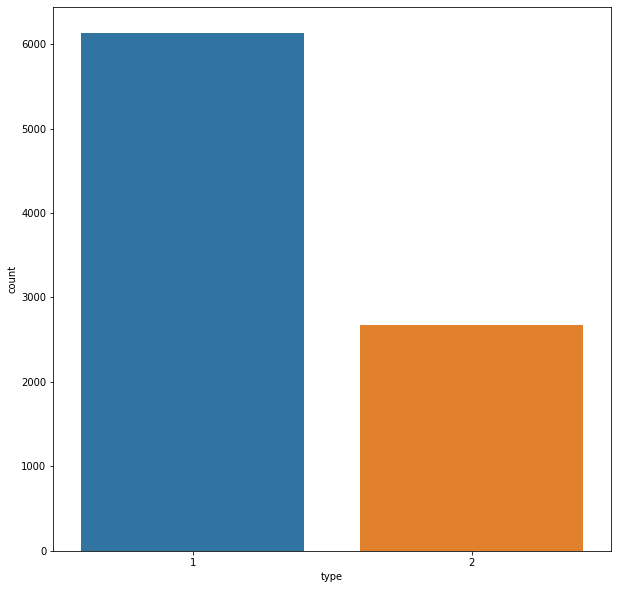

In [162]:
sns.countplot(data = df8, x = 'type')

In [163]:
t=df[df['type']=="Movie"]

In [164]:
len(t)

6131

In [165]:
print(df7['A'].value_counts())

Dramas                       1600
Comedies                     1210
Action                        859
Documentaries                 829
International TV Shows        774
Children                      605
Crime TV Shows                399
Kids' TV                      388
Stand-Up Comedy               334
Horror Movies                 275
British TV Shows              253
Docuseries                    221
Anime Series                  176
International Movies          128
Reality TV                    120
TV Comedies                   120
Classic Movies                 80
TV Dramas                      67
Thrillers                      65
Movies                         57
TV Action                      40
Stand-Up Comedy                34
Romantic TV Shows              32
Classic                        22
Anime Features                 21
Independent Movies             20
Music                          18
TV Shows                       16
Sci-Fi                         13
Cult Movies   

In [166]:
print(df7['Acat'].value_counts())

12    1600
7     1210
0      859
10     829
16     774
4      605
8      399
17     388
27     334
13     275
3      253
11     221
2      176
15     128
21     120
30     120
6       80
31      67
35      65
19      57
29      40
28      34
23      32
5       22
1       21
14      20
20      18
34      16
24      13
9       12
32      11
22       3
25       2
18       1
26       1
33       1
Name: Acat, dtype: int64


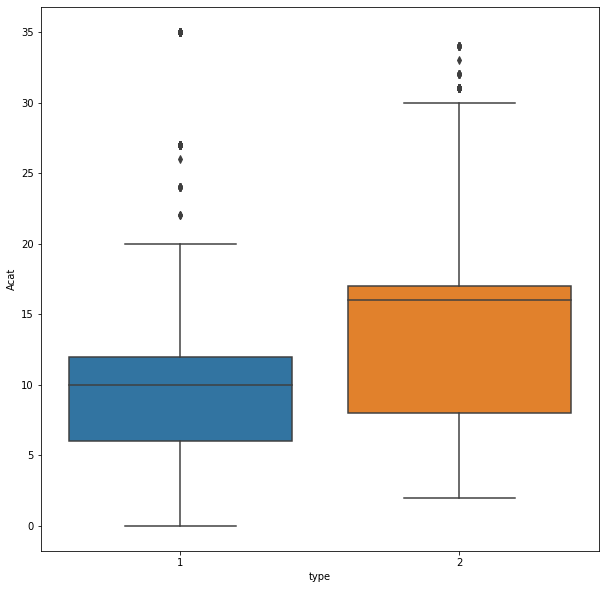

In [167]:
sns.boxplot(data = df8, x='type', y='Acat')

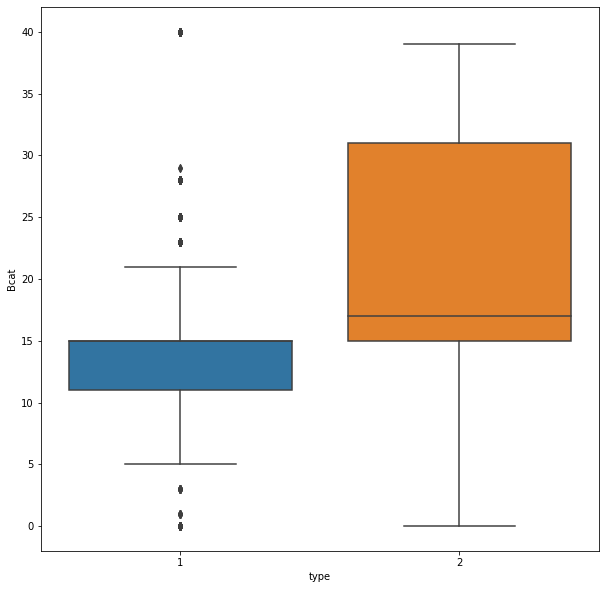

In [168]:
sns.boxplot(data = df8, x='type', y='Bcat')

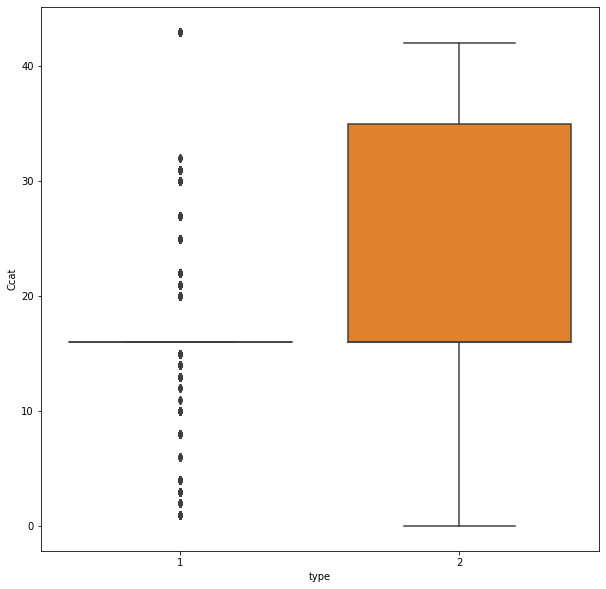

In [169]:
sns.boxplot(data = df8, x='type', y='Ccat')

## Clustering

In [170]:
import category_encoders as cat

#install KModes
from kmodes.kmodes import KModes

In [171]:
km_cao = KModes(n_clusters=6, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1874, cost: 33012.0
Run 1, iteration: 2/100, moves: 11, cost: 33012.0


In [173]:
fitClusters_cao

array([0, 1, 1, ..., 4, 5, 3], dtype=uint16)

In [174]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df8.columns

In [175]:
# Mode of the clusters
clusterCentroidsDf

,type,title,country,duration,Acat,Bcat,Ccat,Dcat,Ecat
0,1,#Alive,United States,1 Season,10,15,16,11,6
1,2,100% Hotter,United States,1 Season,16,16,16,11,6
2,1,"10,000 B.C.",United States,101 min,0,0,16,11,6
3,1,1000 Rupee Note,India,90 min,12,14,16,11,6
4,1,#Selfie,United States,94 min,7,9,16,11,6
5,1,48 Christmas Wishes,United States,93 min,4,11,4,11,6


## Combining the predicted clusters with the original DF

In [176]:
df9 = df8.reset_index()

In [177]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df9, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [178]:
combinedDf.head(1000)

,type,title,country,duration,Acat,Bcat,Ccat,Dcat,Ecat,cluster_predicted
0,1,Dick Johnson Is Dead,United States,90 min,10,15,16,11,6,0
1,2,Blood & Water,South Africa,2 Seasons,16,33,38,11,6,1
2,2,Ganglands,United States,1 Season,8,16,34,0,6,1
3,2,Jailbirds New Orleans,United States,1 Season,11,22,16,11,6,1
4,2,Kota Factory,India,2 Seasons,16,24,35,11,6,1
...,...,...,...,...,...,...,...,...,...,...
995,1,Vizontele,Turkey,106 min,7,9,16,11,6,4
996,1,HOMUNCULUS,Japan,116 min,13,15,43,11,6,0
997,2,Life in Color with David Attenborough,"Australia, United Kingdom",1 Season,3,8,17,11,6,1
998,1,Searching For Sheela,India,58 min,10,15,16,11,6,0


# *Cluster Identification*

In [179]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5= combinedDf[combinedDf['cluster_predicted'] == 5]


In [180]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3523 entries, 0 to 8801
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   type               3523 non-null   object
 1   title              3523 non-null   object
 2   country            3523 non-null   object
 3   duration           3523 non-null   object
 4   Acat               3523 non-null   int8  
 5   Bcat               3523 non-null   int8  
 6   Ccat               3523 non-null   int8  
 7   Dcat               3523 non-null   int8  
 8   Ecat               3523 non-null   int8  
 9   cluster_predicted  3523 non-null   uint16
dtypes: int8(5), object(4), uint16(1)
memory usage: 161.7+ KB


In [181]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2146 entries, 1 to 8803
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   type               2146 non-null   object
 1   title              2146 non-null   object
 2   country            2146 non-null   object
 3   duration           2146 non-null   object
 4   Acat               2146 non-null   int8  
 5   Bcat               2146 non-null   int8  
 6   Ccat               2146 non-null   int8  
 7   Dcat               2146 non-null   int8  
 8   Ecat               2146 non-null   int8  
 9   cluster_predicted  2146 non-null   uint16
dtypes: int8(5), object(4), uint16(1)
memory usage: 98.5+ KB


In [182]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 36 to 8792
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   type               882 non-null    object
 1   title              882 non-null    object
 2   country            882 non-null    object
 3   duration           882 non-null    object
 4   Acat               882 non-null    int8  
 5   Bcat               882 non-null    int8  
 6   Ccat               882 non-null    int8  
 7   Dcat               882 non-null    int8  
 8   Ecat               882 non-null    int8  
 9   cluster_predicted  882 non-null    uint16
dtypes: int8(5), object(4), uint16(1)
memory usage: 40.5+ KB


In [183]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 7 to 8806
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   type               933 non-null    object
 1   title              933 non-null    object
 2   country            933 non-null    object
 3   duration           933 non-null    object
 4   Acat               933 non-null    int8  
 5   Bcat               933 non-null    int8  
 6   Ccat               933 non-null    int8  
 7   Dcat               933 non-null    int8  
 8   Ecat               933 non-null    int8  
 9   cluster_predicted  933 non-null    uint16
dtypes: int8(5), object(4), uint16(1)
memory usage: 42.8+ KB


In [184]:
cluster_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 9 to 8804
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   type               726 non-null    object
 1   title              726 non-null    object
 2   country            726 non-null    object
 3   duration           726 non-null    object
 4   Acat               726 non-null    int8  
 5   Bcat               726 non-null    int8  
 6   Ccat               726 non-null    int8  
 7   Dcat               726 non-null    int8  
 8   Ecat               726 non-null    int8  
 9   cluster_predicted  726 non-null    uint16
dtypes: int8(5), object(4), uint16(1)
memory usage: 33.3+ KB


In [186]:
cluster_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 6 to 8805
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   type               597 non-null    object
 1   title              597 non-null    object
 2   country            597 non-null    object
 3   duration           597 non-null    object
 4   Acat               597 non-null    int8  
 5   Bcat               597 non-null    int8  
 6   Ccat               597 non-null    int8  
 7   Dcat               597 non-null    int8  
 8   Ecat               597 non-null    int8  
 9   cluster_predicted  597 non-null    uint16
dtypes: int8(5), object(4), uint16(1)
memory usage: 27.4+ KB


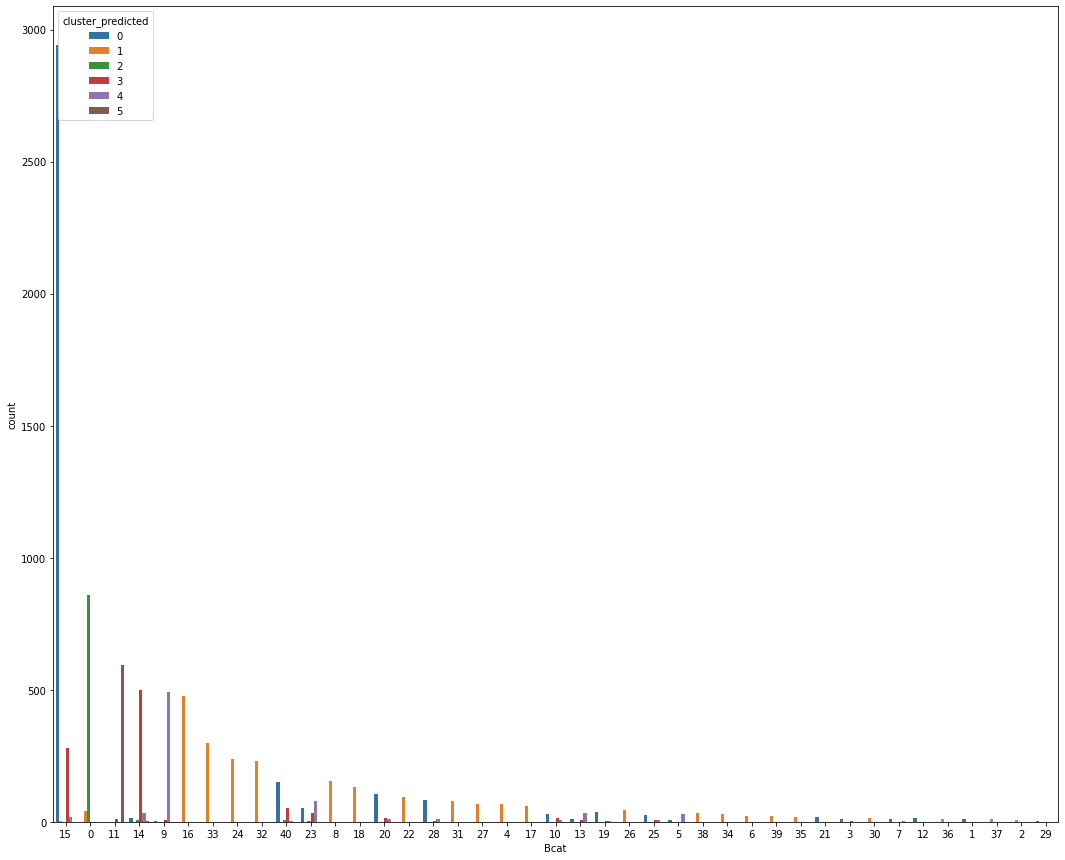

In [187]:
plt.subplots(figsize = (18,15))
sns.countplot(x=combinedDf['Bcat'],order=combinedDf['Bcat'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

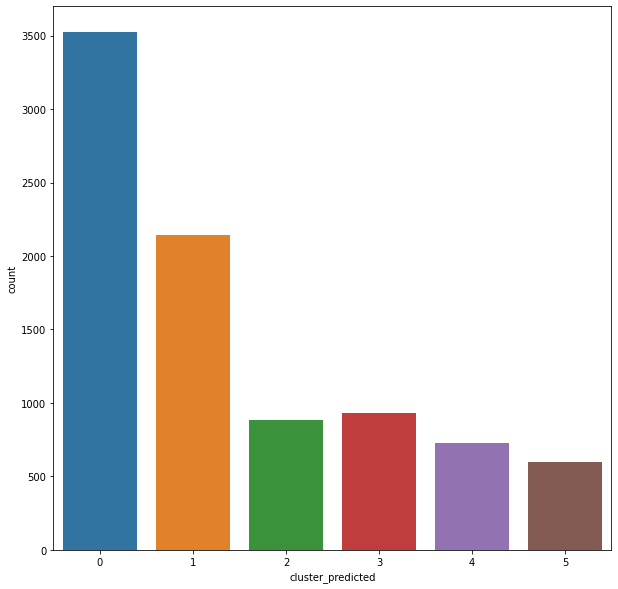

In [188]:
sns.countplot(x='cluster_predicted' , data=combinedDf)

# **Thank you** :) 